In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# colocando os parâmetros

mr = 0.5/1000 #em gramas
m = 42.24/1000 #em gramas
R1 = 1/1000 #em metros
R2 = 99/2/1000 #em metros
I = 1/2*(mr*((R1**2)+(R2**2)))
g = 9.8 #metros/segundo**2
peso = m*g #em N
Cd = 0.82
A = (2/100)*(2/100)
p = 1
ang = math.radians(10)
sen = math.sin(ang)
cos = math.cos(ang)
altura = 0.8*math.sin(ang)
Xmax = altura/math.tan(ang) #comprimento no eixo x
R_do_loop = 11/100

print("Altura: ", altura)
print("Xmax: ", Xmax)

Altura:  0.13891854213354426
Xmax:  0.7878462024097663


In [38]:
def Rampa(listaSolucao, t, a, Xmax):
    x = listaSolucao[0]
    y = listaSolucao[1]
    Vx = listaSolucao[2]
    Vy = listaSolucao[3]
    v = math.sqrt(Vx**2 + Vy**2)
    D = 1/2*(p*Cd*A*(v**2))
    N = peso*cos
    fat = (peso*sen-D)/(4 + m*(R2**2)/I)
    D = 0
    dxdt = Vx
    dydt = Vy
    dVxdt = ((N*sen) - (D*cos) - (4*fat*cos))/m
    dVydt = ((N*cos) + (D*sen) + (4*fat*sen))/m - g    
    if x > Xmax:        
        dVxdt = 0
        dVydt = 0        
    return dxdt, dydt, dVxdt, dVydt

In [39]:
delta_t = 1e-4
tempo = np.arange(0,2,delta_t)
CI = [0,altura,0,0]
solucaoRampa = odeint(Rampa, CI, tempo, args=(ang, Xmax))

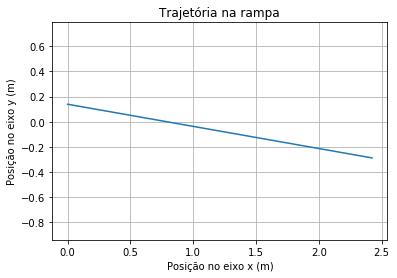

In [40]:
#plotando trajtória
plt.plot(solucaoRampa[:,0], solucaoRampa[:,1])
plt.xlabel('Posição no eixo x (m)')
plt.ylabel('Posição no eixo y (m)')
plt.title('Trajetória na rampa')
plt.axis('equal')
plt.grid(True)
plt.show()

In [41]:
def Loop(listaSolucao, t):
    a = listaSolucao[0]
    w = listaSolucao[1]
    dadt = w
    v = w*R_do_loop
    D = 1/2*(p*Cd*A*(v**2))
    D=0
    #velocidade positiva
    if w > 0:
        fat = (-peso*math.cos(a)-D)/(4 + m*(R2**2)/I)       
        dwdt = (-peso*math.cos(a) - D - 4*fat)/(m*R_do_loop)       

    #velocidade negativa
    else:
        fat = (peso*math.cos(a)-D)/(4 + m*(R2**2)/I)
        dwdt = (-peso*math.cos(a) + D + 4*fat)/(m*R_do_loop)
    return dadt, dwdt

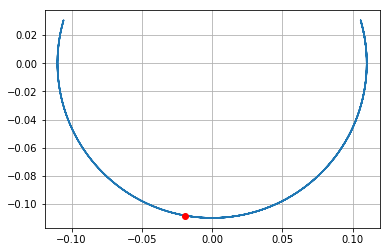

In [42]:
vxf = solucaoRampa[:,2][-1]
vyf = solucaoRampa[:,3][-1]
vf = math.sqrt((vxf**2) + (vyf**2))
a0 = -math.pi/2 - ang
w0 = vf/R_do_loop
CI1 = [a0,w0]
solucaoLoop = odeint(Loop, CI1, tempo)

#lista de todos os alphas no tempo
alphas = solucaoLoop[:,0]

#lista de todos os omegas no tempo
omegas = solucaoLoop[:,1]

#Calculando posição
xloop = [R_do_loop*math.cos(a) for a in alphas]
yloop = [R_do_loop*math.sin(a) for a in alphas]
plt.plot(xloop, yloop)
plt.plot(xloop[0], yloop[0], 'ro')
plt.axis('equal')
plt.grid(True)
plt.show()

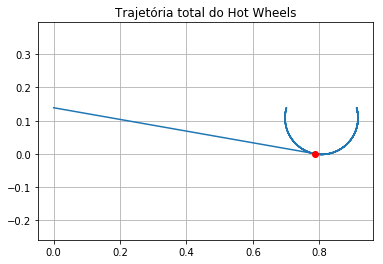

In [43]:
xtotal = []
ytotal = []

for i in range(0,len(tempo)):
    if(solucaoRampa[:,1][i]>=0):
        xtotal.append(solucaoRampa[:,0][i])
        ytotal.append(solucaoRampa[:,1][i])
        
for i in range(0,len(tempo)):
    xtotal.append(xloop[i] + Xmax + R_do_loop*math.sin(ang))
    ytotal.append(yloop[i] + R_do_loop*math.cos(ang)) 


plt.plot(xtotal, ytotal)
plt.plot(Xmax,0, 'ro')
plt.axis('equal')
plt.grid(True)
plt.title('Trajetória total do Hot Wheels')
plt.show()

In [44]:
#código para ver o comportamento da força Normal no percurso

def CaiuOuNao(solucaoLoop):
    
    ListaN=[]
    for i in range(0, len(tempo)):
        a = (solucaoLoop[:,0])[i]
        w = (solucaoLoop[:,1])[i]     
        N=m*w**2*R_do_loop-m*g*math.sin(a)
        ListaN.append(N)    
    
    for i, N in enumerate(ListaN):
        if N < 0:
            Caiu=True
            break
        if i == len(ListaN)-1:
            Caiu=False
    return Caiu
   
    
    
    


In [45]:
if CaiuOuNao(solucaoLoop) is True:
    print("O carrinho cai com ângulo %.1f" %math.degrees(ang))
else:
    print("O carrinho não cai com ângulo %.1f" %math.degrees(ang))

O carrinho cai com ângulo 10.0
